## ```Imports```
---

In [68]:
# standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# modeling libraries
from classifiers_copy1 import classify
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## ```Initial Modeling```
---

In [2]:
fraud = pd.read_csv('../SmallBalancedClasses.csv')

In [3]:
fraud.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour
0,2019-12-13 05:41:26,378278619832195,fraud_Dach-Nader,misc_net,3.17,F,Eugene,OR,97403,44.0385,-123.0614,191096,"Scientist, physiological",1964-04-06,44.716305,-123.984986,0,6
1,2020-03-11 22:31:29,4725837176265195730,fraud_Torphy-Goyette,shopping_pos,16.37,F,Jay,FL,32565,30.8985,-87.1332,5719,Higher education careers adviser,1994-11-05,30.635023,-88.086411,0,23
2,2019-11-12 01:08:37,373905417449658,fraud_Bruen-Yost,misc_pos,8.54,F,Meridian,TX,76665,31.9290,-97.6443,2526,Phytotherapist,1970-11-12,32.399693,-97.414423,0,2


In [4]:
fraud.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'merch_lat', 'merch_long', 'is_fraud', 'hour'],
      dtype='object')

In [5]:
# dummy for object variables
df_fraud = fraud.copy()
df_fraud = pd.get_dummies(fraud, columns=['gender','city','state','category','merchant'])
df_fraud.shape

(15012, 1662)

In [25]:
# setting up X/y
X = df_fraud.drop(columns=['trans_date_trans_time','lat', 'long','job','merch_lat', 'merch_long','dob','is_fraud'])
y = df_fraud['is_fraud']

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

# standard scale the data
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [26]:
result = classify(X_train_ss,X_test_ss,y_train,y_test)

/Users/crivera/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/crivera/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

In [45]:
result

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
knn,0.765166,0.667732,0.097433,0.785285,0.696815,0.088470,0.723369,0.640590,0.082779,0.858792,0.763859,0.094933
logreg,0.899547,0.839329,0.060218,0.898592,0.839071,0.059521,0.907297,0.840192,0.067104,0.890053,0.837953,0.052100
dt,1.000000,0.963229,0.036771,1.000000,0.963569,0.036431,1.000000,0.954498,0.045502,1.000000,0.972814,0.027186
bag,0.995470,0.963496,0.031974,0.995464,0.963785,0.031678,0.996971,0.955952,0.041020,0.993961,0.971748,0.022213
bag_knn,0.776090,0.670397,0.105693,0.793614,0.696888,0.096726,0.736067,0.644898,0.091169,0.860924,0.757996,0.102928
bag_log,0.901146,0.836930,0.064215,0.899685,0.835307,0.064378,0.913266,0.843478,0.069788,0.886501,0.827292,0.059209
rf,1.000000,0.966160,0.033840,1.000000,0.966124,0.033876,1.000000,0.966898,0.033102,1.000000,0.965352,0.034648
et,1.000000,0.938449,0.061551,1.000000,0.937347,0.062653,1.000000,0.954169,0.045831,1.000000,0.921109,0.078891
ada,0.947509,0.944578,0.002931,0.947019,0.944116,0.002903,0.956018,0.951788,0.004230,0.938188,0.936567,0.001621
gboost,0.965006,0.961364,0.003642,0.964890,0.961385,0.003506,0.968169,0.960617,0.007551,0.961634,0.962154,0.000519


In [44]:
result[result['Train Acc']==1]

,Train Acc,Test Acc,Acc-diff,Train-F1,Test-F1,F1-diff,Train-Pres,Test-Pres,Pres-diff,Train_Recall,Test-Recall,Recall_diff
dt,1.0,0.963229,0.036771,1.0,0.963569,0.036431,1.0,0.954498,0.045502,1.0,0.972814,0.027186
rf,1.0,0.966160,0.033840,1.0,0.966124,0.033876,1.0,0.966898,0.033102,1.0,0.965352,0.034648
et,1.0,0.938449,0.061551,1.0,0.937347,0.062653,1.0,0.954169,0.045831,1.0,0.921109,0.078891


train Acc: 1.0
test Acc: 0.9672262190247801


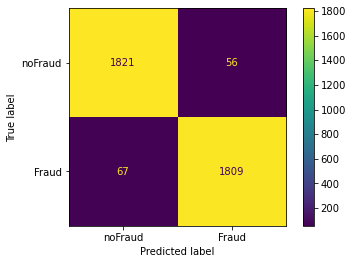

In [77]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_ss,y_train)

# score model
print(f"train Acc: {rf.score(X_train_ss,y_train)}")
print(f"test Acc: {rf.score(X_test_ss,y_test)}")

# Confusion Matrix
plot_confusion_matrix(rf, X_test_ss, y_test, display_labels=['noFraud','Fraud'])
plt.show()

In [66]:
pd.DataFrame(rf.feature_importances_, index=X.columns).sort_values(by = 0, ascending=False)

,0
amt,3.884739e-01
hour,1.530275e-01
category_shopping_net,2.138084e-02
city_pop,1.930910e-02
zip,1.929993e-02
...,...
city_Annapolis,4.985411e-08
city_Pelham,7.716042e-09
city_Churubusco,8.690475e-10
city_Boyd,0.000000e+00


In [69]:
# setup gridsearch params
rf_params = {
    'n_estimators': [100,125,150,175,200],
    'criterion': ["gini", "entropy"],
    'min_samples_split': [2,3,4,5],
    'max_depth' : [4,5,6,7,8]
    
}


#
gs = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5)
gs.fit(X_train_ss,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 125, 150, 175, 200]})

In [70]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 4,
 'n_estimators': 100}

In [71]:
print(f"train Acc: {gs.score(X_train_ss,y_train)}")
print(f"test Acc: {gs.score(X_test_ss,y_test)}")

train Acc: 0.8779642952304823
test Acc: 0.8697042366107114


In [76]:
rf2 = RandomForestClassifier(n_estimators=100, min_samples_split=4, criterion='entropy', max_depth=8, random_state=42)
rf2.fit(X_train_ss,y_train)
print(f"train Acc: {rf2.score(X_train_ss,y_train)}")
print(f"test Acc: {rf2.score(X_test_ss,y_test)}")

train Acc: 0.8648192557065458
test Acc: 0.8665067945643485
